## Edge Detection
## Finding Contour
## Perspective Transform

In [6]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    # return the warped image
    return warped

In [35]:
import cv2
import imutils
from skimage.filters import threshold_local
import numpy as np

img_path = 'bill.jpg'
big_img = cv2.imread(img_path)
cv2.imshow('org img',big_img)
cv2.waitKey(0)


ratio = big_img.shape[0] / 500.0
org = big_img.copy()
img = imutils.resize(big_img, height = 500)
cv2.imshow('resizing',img)
cv2.waitKey(0)

gray_img = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_img,(5,5),0)
edged_img = cv2.Canny(blur_img,75,200)
cv2.imshow('edged',edged_img)
cv2.waitKey(0)


cnts,_ = cv2.findContours(edged_img.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts,key=cv2.contourArea,reverse=True)[:5]
for c in cnts:
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.02*peri,True)
    if len(approx)==4:
        doc = approx
        break
        
        
p=[]
for d in doc:
    tuple_point = tuple(d[0])
    cv2.circle(img,tuple_point,3,(0,0,255),4)
    p.append(tuple_point)
cv2.imshow('Corner points detected',img)
cv2.waitKey(0)


warped = four_point_transform(org, doc.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
cv2.imshow("Warped", imutils.resize(warped, height = 650))
cv2.waitKey(0)


T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
cv2.imshow("Scanned", imutils.resize(warped, height = 650))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import cv2 
import imutils
from skimage.filters import threshold_local
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
img_path = 'billa.jpg'
big_img = cv2.imread(img_path)
big_img

array([[[ 44,  87, 130],
        [ 48,  91, 134],
        [ 51,  92, 137],
        ...,
        [ 46,  81, 131],
        [ 42,  79, 129],
        [ 42,  79, 129]],

       [[ 52,  94, 139],
        [ 52,  94, 139],
        [ 50,  92, 139],
        ...,
        [ 44,  81, 131],
        [ 43,  80, 130],
        [ 43,  80, 130]],

       [[ 46,  89, 138],
        [ 44,  87, 136],
        [ 44,  87, 136],
        ...,
        [ 44,  81, 131],
        [ 43,  80, 130],
        [ 43,  80, 130]],

       ...,

       [[ 10,  12,  22],
        [  9,  11,  21],
        [  8,  10,  20],
        ...,
        [  6,   5,   7],
        [  9,   5,  10],
        [  9,   5,  10]],

       [[  8,  12,  23],
        [  7,  11,  22],
        [  7,  11,  22],
        ...,
        [  9,   6,   8],
        [ 10,   4,   9],
        [ 10,   4,   9]],

       [[  6,  12,  25],
        [  5,  11,  24],
        [  7,  11,  22],
        ...,
        [  9,   6,   8],
        [ 10,   4,   9],
        [ 11,   4,   9]]

In [22]:
cv2.imshow('org img',big_img)
cv2.waitKey(0)

-1

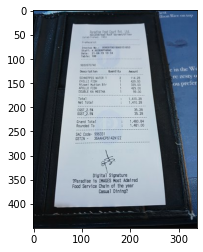

In [15]:
plt.imshow(big_img)
plt.show()

In [16]:
ratio = big_img.shape[0] / 500.0
ratio

0.9

In [17]:
print(big_img.shape)

(450, 338, 3)


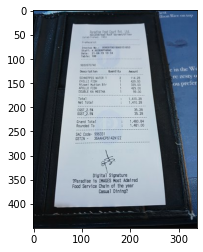

In [19]:
# ascept ratio?
org = big_img.copy()
plt.imshow(org)
plt.show()

In [20]:
img = imutils.resize(big_img, height = 500)
cv2.imshow('resizing',img)
print(img.shape)
cv2.waitKey(0)

(500, 375, 3)


-1

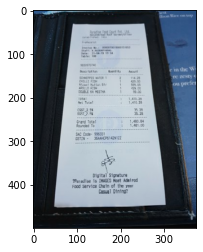

In [21]:
plt.imshow(img)
plt.show()

In [29]:
gray_img = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray_img,(5,5),0)
edged_img = cv2.Canny(blur_img,75,200)
cv2.imshow('edged',edged_img)
cv2.waitKey(0)

-1

In [24]:
# what is convoution?
# what is contour?

In [26]:
#Noise reduction
# Gradient calculation
#Non-max suppression
# Double threshold
# Edge tracking by hystersis

In [28]:
cv2.Canny?

In [31]:
cnts,_ = cv2.findContours(edged_img.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts,key=cv2.contourArea,reverse=True)[:5]
for c in cnts:
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.02*peri,True)
    if len(approx)==4:
        doc = approx
        break
        
        
p=[]
for d in doc:
    tuple_point = tuple(d[0])
    cv2.circle(img,tuple_point,3,(0,0,255),4)
    p.append(tuple_point)
cv2.imshow('Corner points detected',img)
cv2.waitKey(0)

-1

In [32]:
warped = four_point_transform(org, doc.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
cv2.imshow("Warped", imutils.resize(warped, height = 650))
cv2.waitKey(0)


T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
cv2.imshow("Scanned", imutils.resize(warped, height = 650))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
warped = four_point_transform(org, doc.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
cv2.imshow("Warped", imutils.resize(warped, height = 650))
cv2.waitKey(0)

-1

In [36]:
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
cv2.imshow("Scanned", imutils.resize(warped, height = 650))
cv2.waitKey(0)
cv2.destroyAllWindows()